In [11]:
import duckdb
con = duckdb.connect("c:/Code/Local Code/deadlock_match_prediction/data/deadlock.db")

In [10]:
con.close()

In [3]:
df = con.execute("SELECT * FROM player_matches LIMIT 10").fetchdf()
df

,account_id,match_id,hero_id,team,kills,deaths,assists,denies,net_worth,won
0,1699896029,35533788,19,Team0,6,9,7,1,34332,False
1,1477635501,35533788,10,Team1,5,7,27,4,34086,True
2,860208532,35533788,50,Team0,8,9,11,3,32533,False
3,298305257,35533788,27,Team0,6,6,13,2,34025,False
4,888853854,35533788,7,Team0,7,10,10,6,34876,False
5,87241154,35533788,15,Team0,3,13,13,10,30269,False
6,1036606523,35533788,35,Team1,8,6,19,0,34983,True
7,1144439143,35533788,20,Team0,2,7,15,2,34073,False
8,211347551,35533788,31,Team1,13,6,19,5,39134,True
9,455962169,35533788,1,Team1,10,5,21,5,47374,True


In [ ]:
response = con.execute("""SELECT 
    account_id,
    COUNT(DISTINCT match_id) AS match_count
FROM 
    player_matches
GROUP BY 
    account_id
ORDER BY 
    match_count DESC
LIMIT 25;""").fetchdf()
print(response)

In [ ]:
response = con.execute("""SELECT 
    match_count,
    COUNT(*) AS player_count
FROM (
    SELECT 
        account_id,
        COUNT(DISTINCT match_id) AS match_count
    FROM 
        player_matches
    GROUP BY 
        account_id
) t
GROUP BY 
    match_count
ORDER BY 
    match_count;""").fetchdf()
print(response)

In [ ]:
response = con.execute("""
        SELECT 
            pm.account_id,
            COUNT(DISTINCT pm.match_id) AS match_count,
            MAX(m.start_time) AS match_time
        FROM 
            player_matches pm
        JOIN
            matches m ON pm.match_id = m.match_id
        GROUP BY 
            pm.account_id
        HAVING 
            match_count > 10
        ORDER BY
            match_time DESC
        LIMIT 5
        """).fetchdf()
print(response)

In [3]:
df = con.execute("""
    SELECT *
    FROM player_trends
                 limit 25
""").fetchdf()
print(df)

    account_id  p_average_kills  p_average_deaths  p_avg_kd  p_total_matches  \
0     15763789             9.09              7.52      1.21             1424   
1     10258152            10.19              6.29      1.62              791   
2    835851102             9.39              5.10      1.84              724   
3   1668944095             7.68              6.72      1.14              556   
4   1379380193             8.07              6.90      1.17             1859   
5    445400791             8.21              7.26      1.13              975   
6    316441186             6.53              6.59      0.99             2458   
7     66649287             9.01              5.07      1.78             2669   
8   1250845755             7.34              5.64      1.30             1249   
9    136898005             7.89              5.63      1.40             1587   
10   836484910             8.40              6.54      1.29             2099   
11   900220895             6.26         

In [5]:
df = con.execute("""
    SELECT p_v_h_kd_pct,
    FROM player_rolling_stats
                 limit 25
""").fetchdf()
print(df)

    p_v_h_kd_pct
0           <NA>
1           <NA>
2           <NA>
3           <NA>
4           <NA>
5           <NA>
6           <NA>
7           <NA>
8           <NA>
9           <NA>
10          <NA>
11          <NA>
12          <NA>
13          <NA>
14          <NA>
15          <NA>
16          <NA>
17          <NA>
18          <NA>
19          <NA>
20          <NA>
21          <NA>
22          <NA>
23          <NA>
24          <NA>


In [12]:
query = """
SELECT 
    account_id,
    p_avg_kd,
    p_total_matches,
    p_win_rate,
    p_win_streak_avg,
    p_loss_streak_avg,
    win_streaks_2plus,
    win_streaks_3plus,
    win_streaks_4plus,
    loss_streaks_2plus,
    loss_streaks_3plus,
    loss_streaks_4plus,
    win_streaks_5plus,
    loss_streaks_5plus,
FROM player_trends
WHERE p_total_matches > 501
AND p_total_matches < 3000
LIMIT 25
"""

df = con.execute(query).fetchdf()
print(df)

    account_id  p_avg_kd  p_total_matches  p_win_rate  p_win_streak_avg  \
0    429795010      1.36             1194   55.029999          2.313380   
1   1150831835      1.43              826   62.110001          2.772973   
2    233893017      0.97              621   52.500000          2.187919   
3   1173747068      1.61              725   53.380001          2.263158   
4    197865966      1.20              532   50.000000          2.062016   
5    392086095      1.13              731   51.439999          2.278788   
6   1477660209      1.27              964   55.810001          2.456621   
7   1062898121      1.41             1625   52.740002          2.116049   
8    130174860      1.37             1309   52.560001          2.143302   
9    272697072      1.05              895   54.299999          2.160000   
10    59536063      1.31              642   53.119999          2.041916   
11   858544160      1.50             1456   48.900002          1.983287   
12   115965224      1.07 

In [13]:
response = con.execute("""
    SELECT count(*)
    FROM player_trends""").fetchdf()
print(response)

   count_star()
0         17253


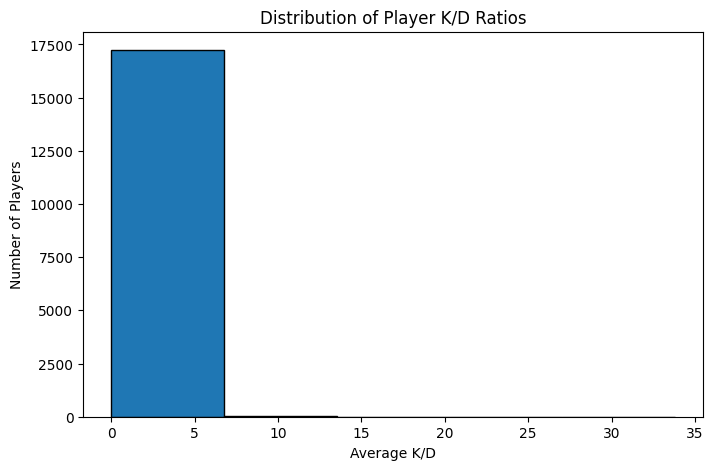

In [32]:
import matplotlib.pyplot as plt
df = con.execute("""
    SELECT *
    FROM player_trends
""").fetchdf()
plt.figure(figsize=(8, 5))
plt.hist(df['p_avg_kd'], bins=5, edgecolor='black')
plt.xlabel("Average K/D")
plt.ylabel("Number of Players")
plt.title("Distribution of Player K/D Ratios")
plt.show()

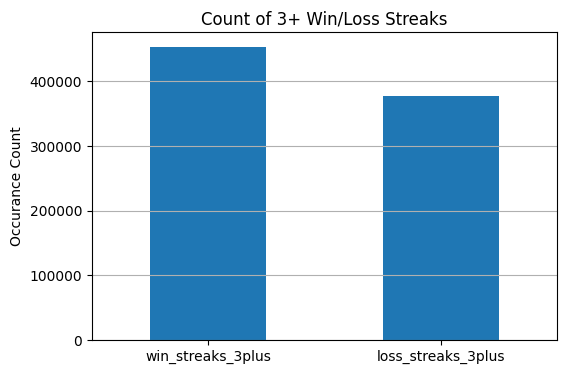

In [20]:
streak_counts = df[['win_streaks_3plus', 'loss_streaks_3plus']].sum()

streak_counts.plot(kind='bar', figsize=(6,4))
plt.title("Count of 3+ Win/Loss Streaks")
plt.ylabel("Occurance Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

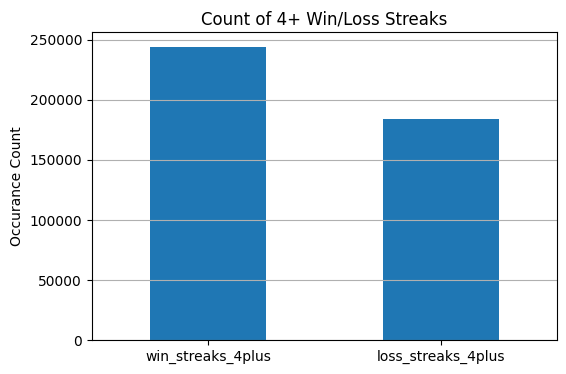

In [21]:
streak_counts = df[['win_streaks_4plus', 'loss_streaks_4plus']].sum()

streak_counts.plot(kind='bar', figsize=(6,4))
plt.title("Count of 4+ Win/Loss Streaks")
plt.ylabel("Occurance Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

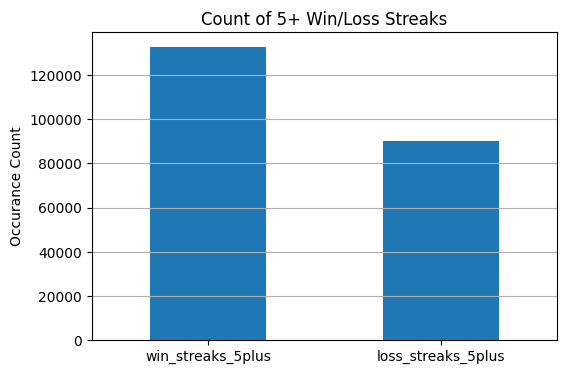

In [22]:
streak_counts = df[['win_streaks_5plus', 'loss_streaks_5plus']].sum()

streak_counts.plot(kind='bar', figsize=(6,4))
plt.title("Count of 5+ Win/Loss Streaks")
plt.ylabel("Occurance Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

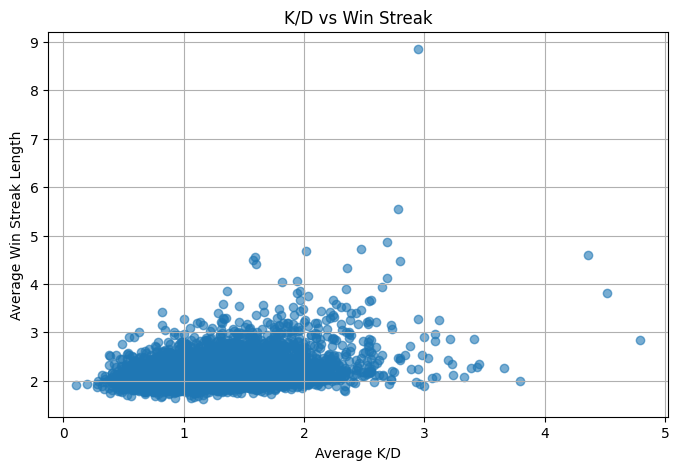

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(df['p_avg_kd'], df['p_win_streak_avg'], alpha=0.6)
plt.xlabel("Average K/D")
plt.ylabel("Average Win Streak Length")
plt.title("K/D vs Win Streak")
plt.grid(True)
plt.show()

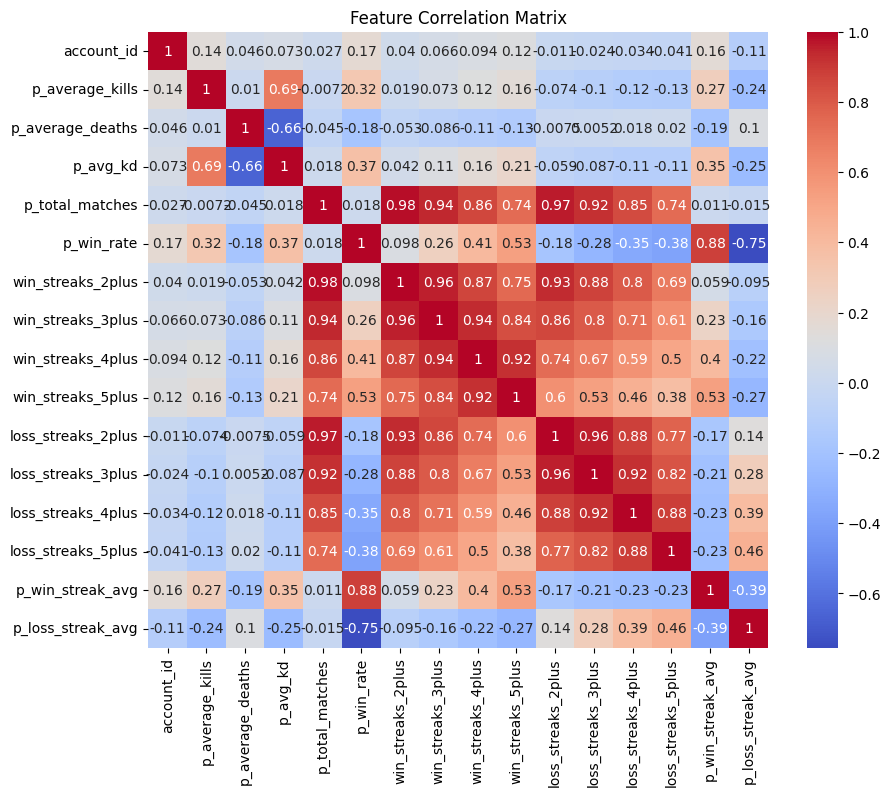

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

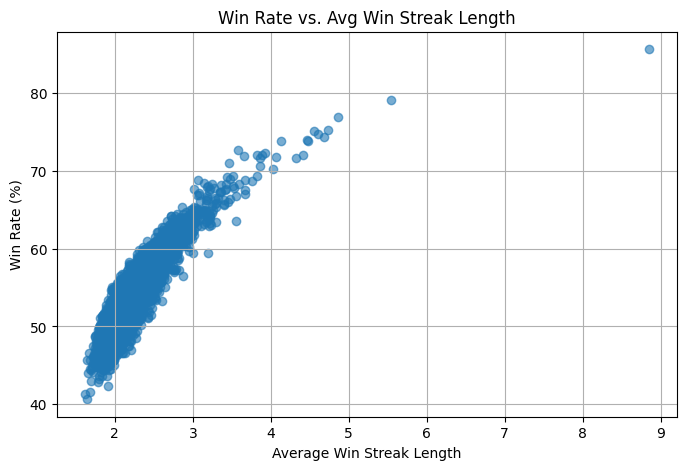

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(df['p_win_streak_avg'], df['p_win_rate'], alpha=0.6)
plt.xlabel("Average Win Streak Length")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. Avg Win Streak Length")
plt.grid(True)
plt.show()

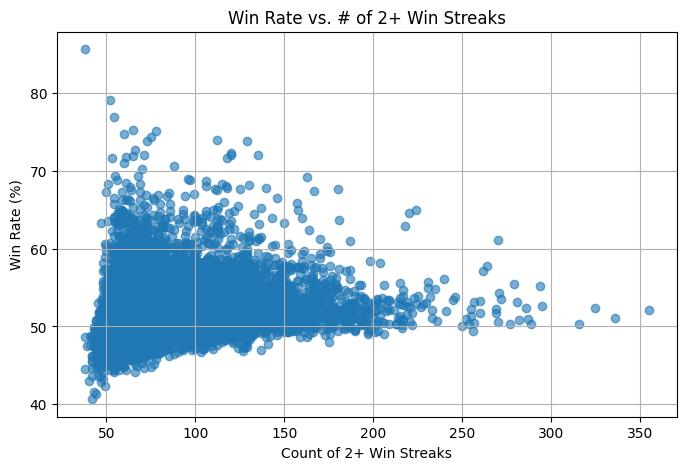

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df['win_streaks_2plus'], df['p_win_rate'], alpha=0.6)
plt.xlabel("Count of 2+ Win Streaks")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. # of 2+ Win Streaks")
plt.grid(True)
plt.show()

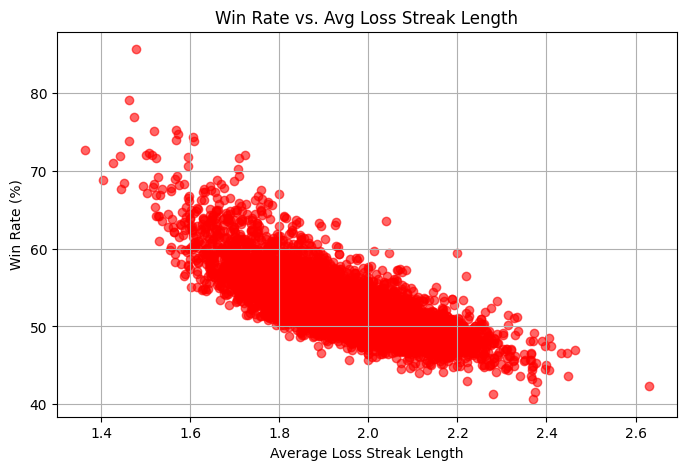

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(df['p_loss_streak_avg'], df['p_win_rate'], alpha=0.6, color='red')
plt.xlabel("Average Loss Streak Length")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. Avg Loss Streak Length")
plt.grid(True)
plt.show()

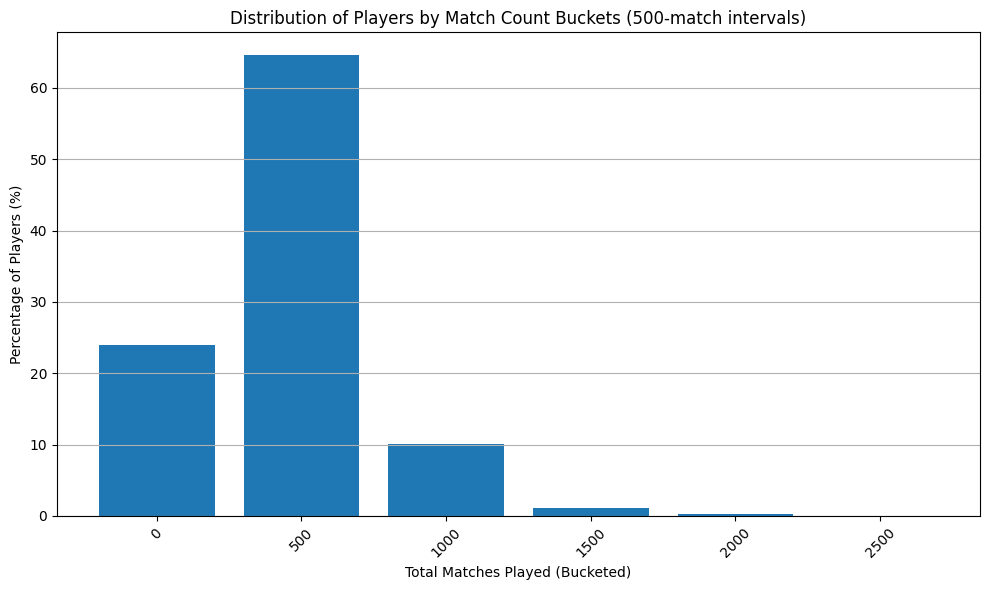

In [29]:
df['match_bucket'] = (df['p_total_matches'] // 500) * 500
bucket_counts = df['match_bucket'].value_counts().sort_index()
bucket_percent = (bucket_counts / len(df)) * 100
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(bucket_percent.index.astype(str), bucket_percent.values)
plt.xlabel("Total Matches Played (Bucketed)")
plt.ylabel("Percentage of Players (%)")
plt.title("Distribution of Players by Match Count Buckets (500-match intervals)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [30]:
roll_df = con.execute("""
    select *
    from player_rolling_stats""").fetchdf()

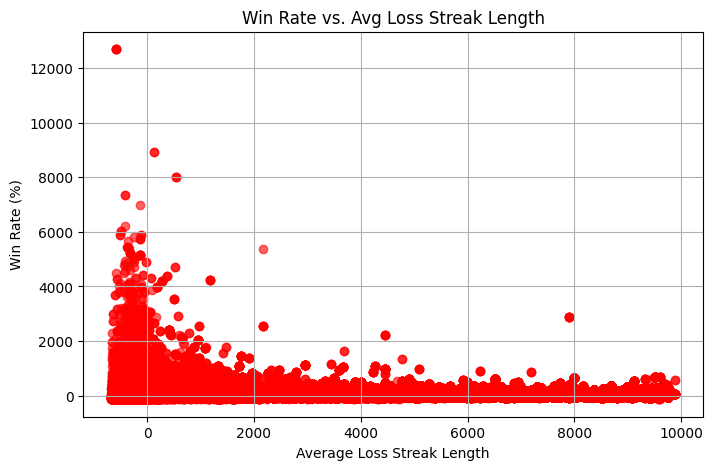

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(roll_df['p_v_h_pick_rate'], roll_df['p_v_h_kd_pct'], alpha=0.6, color='red')
plt.xlabel("p_v_h_pick_rate")
plt.ylabel("p_v_h_kd_pct")
plt.title("player vs hero pick rate vs kd pct")
plt.grid(True)
plt.show()